# ML_LoanPrediction_Project by - Akshay Ghodke

##### --------------------------- Problem Statement1 ---------------------------------
##### Check eligibility of the Customer given the inputs described above.(Classification)

### Read Dataset

In [1]:
import pandas as pd
train = pd.read_csv("D:Data_Sets/Projects/ML_Loan_Project/training_set.csv")
test = pd.read_csv("D:Data_Sets/Projects/ML_Loan_Project/testing_set.csv")

from warnings import filterwarnings 
filterwarnings('ignore')

pd.set_option("display.max_columns",100)
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


### Check dataset info

In [2]:
train.shape

(614, 13)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


### Check Unique values in dataset

In [4]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Dropping unnecessary columns (Columns with no statitical importance)

In [5]:
train = train.drop(labels=['Loan_ID'],axis=1) #Because All Unique

### Missing Data treatment

In [6]:
train.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
for i in train.columns:
    if (train[i].dtype!='object'):
        x = train[i].mean()
        train[i] = train[i].fillna(x)
    else:
            x = train[i].mode()[0]
            train[i] = train[i].fillna(x)

for i in test.columns:
    if (test[i].dtype!='object'):
        x = test[i].mean()
        test[i] = test[i].fillna(x)
    else:
            x = test[i].mode()[0]
            test[i] = test[i].fillna(x)

In [9]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [11]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

## Descriptive Statistics
#### Cat and Con Columns Seperation

In [12]:
con = []
cat = []
for i in train.columns:
    if(train[i].dtypes != "object"):
        con.append(i)
    else:
        cat.append(i)

In [13]:
train[cat].describe().T

,count,unique,top,freq
Gender,614,2,Male,502
Married,614,2,Yes,401
Dependents,614,4,0,360
Education,614,2,Graduate,480
Self_Employed,614,2,No,532
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [14]:
train[cat].describe().T

,count,unique,top,freq
Gender,614,2,Male,502
Married,614,2,Yes,401
Dependents,614,4,0,360
Education,614,2,Graduate,480
Self_Employed,614,2,No,532
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


### Exploratory Data Analysis

In [15]:
train[con].skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

### Univariate Analysis
Con - Histogram Cat - CountPlot

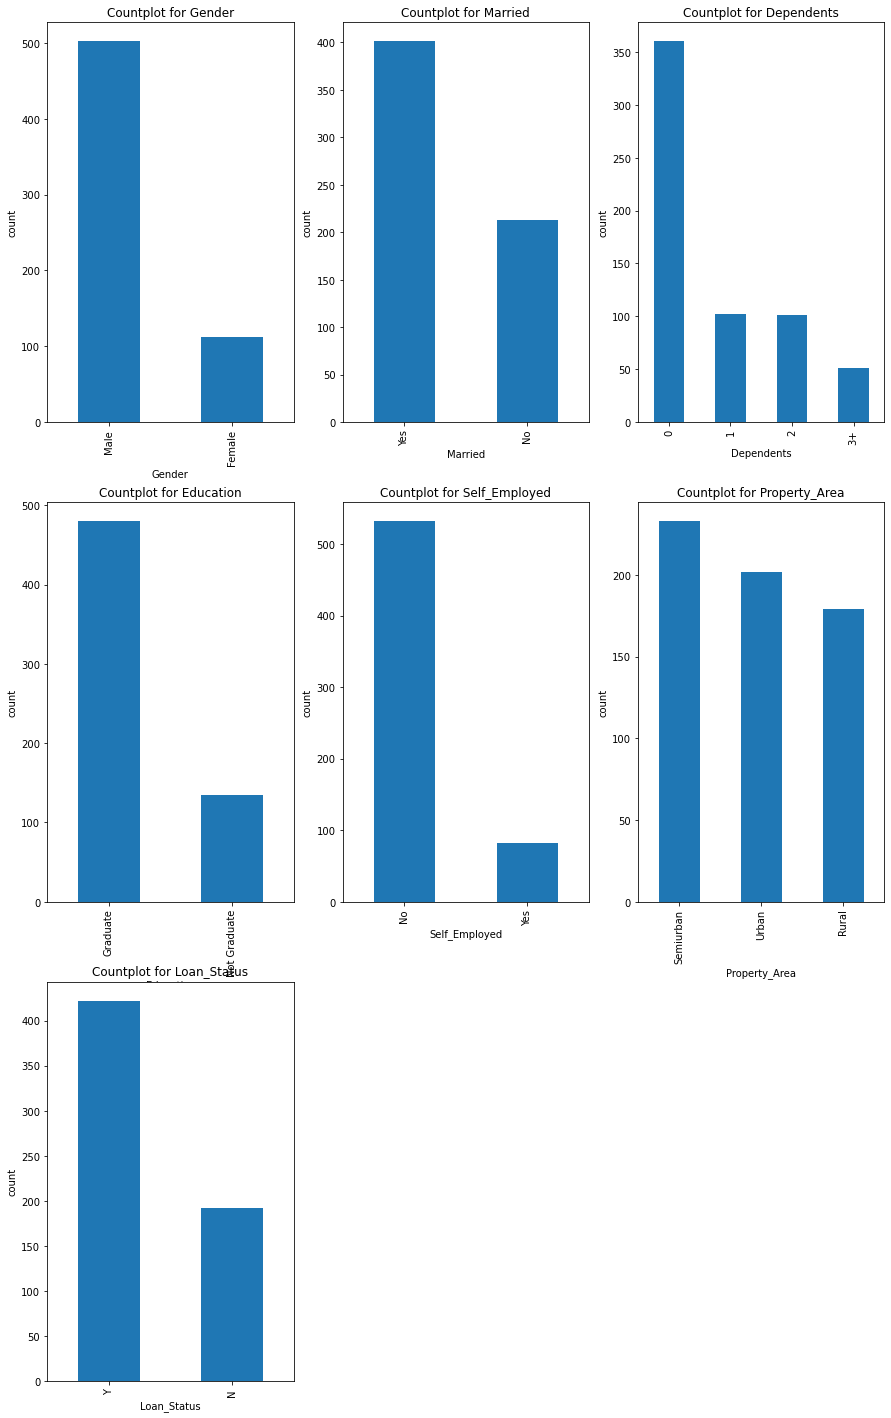

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(15,25))
x=1
for i in cat:
    plt.subplot(3,3,x)
    train[i].value_counts().plot(kind='bar',xlabel=f'{i}',ylabel='count',title=f'Countplot for {i}')
    x=x+1

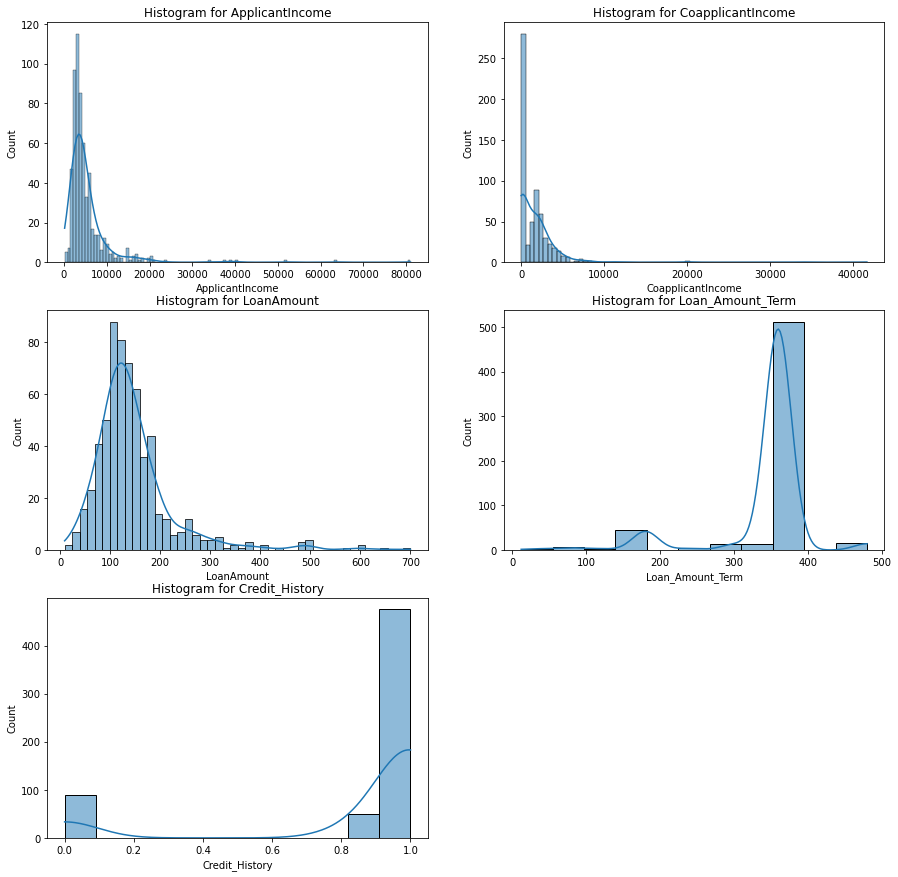

In [17]:
# Plot Histogram for con features
plt.figure(figsize=(15,15))
x=1
for i in con:
    plt.subplot(3,2,x)
    sb.histplot(data=train,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    x=x+1

### Bivariate Analysis
Con vs Con - Count Plot, Scatterplot,
Correlation Heatmap
Cat vs Con - Boxplot

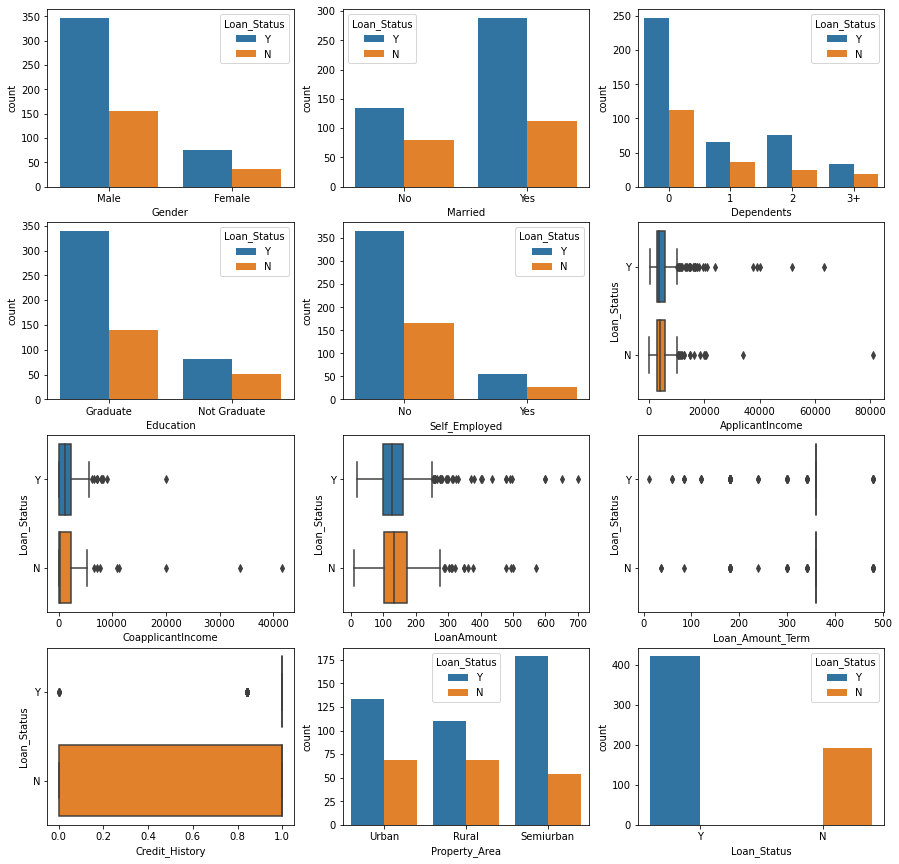

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
x=1

for i in train.columns:
    if (train[i].dtypes != "object"):
        plt.subplot(4,3,x)
        sb.boxplot(train[i],train["Loan_Status"])
        x=x+1
    else:
        plt.subplot(4,3,x)
        sb.countplot(train[i],hue=train["Loan_Status"])
        #sb.scatterplot(train[i],train["Loan_Status"])
        x=x+1

### Correlation Heatmap

In [19]:
train[con].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116625,0.565552,-0.045147,-0.014323
CoapplicantIncome,-0.116625,1.000000,0.187884,-0.059710,-0.001720
LoanAmount,0.565552,0.187884,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045147,-0.059710,0.038801,1.000000,0.001395
Credit_History,-0.014323,-0.001720,-0.007738,0.001395,1.000000


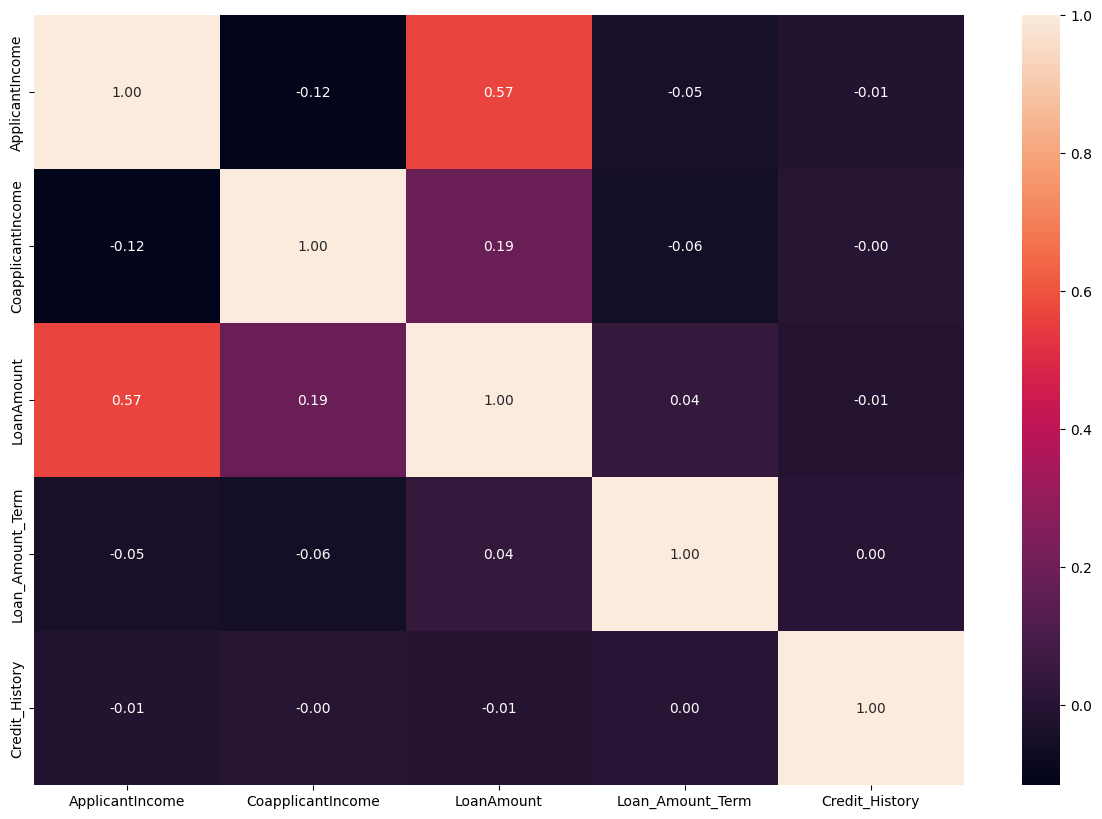

In [20]:
plt.figure(figsize=(15,10))
sb.heatmap(train[con].corr(),annot=True,fmt='.2f')
plt.show()

### Define & Seperate X - Y variables

In [21]:
X = train.drop(labels=['Loan_Status'],axis=1)
Y = train[['Loan_Status']]

In [22]:
cat.remove('Loan_Status')

In [23]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [24]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

### Convert Target Feature into Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])

In [26]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,1


In [27]:
train['Loan_Status'].unique()

array([1, 0])

### - Scaling is not required for decision trees

#### Cat One Hot encoding

In [28]:
X1 = X[con]

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(X[cat]).toarray()
X2

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [30]:
cols = ohe.get_feature_names_out()
cols

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [31]:
X2 = pd.DataFrame(X2,columns=cols)
X2.head(3)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### Combine X1 and X2

In [32]:
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.00000,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,5405.54085,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.00000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.00000,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,6000.00000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.3,random_state=21)

In [34]:
xtrain.shape

(429, 20)

In [35]:
xtest.shape

(185, 20)

### Start Building Decison Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(max_depth=2)
dtc_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

### Visualizing the decision Tree

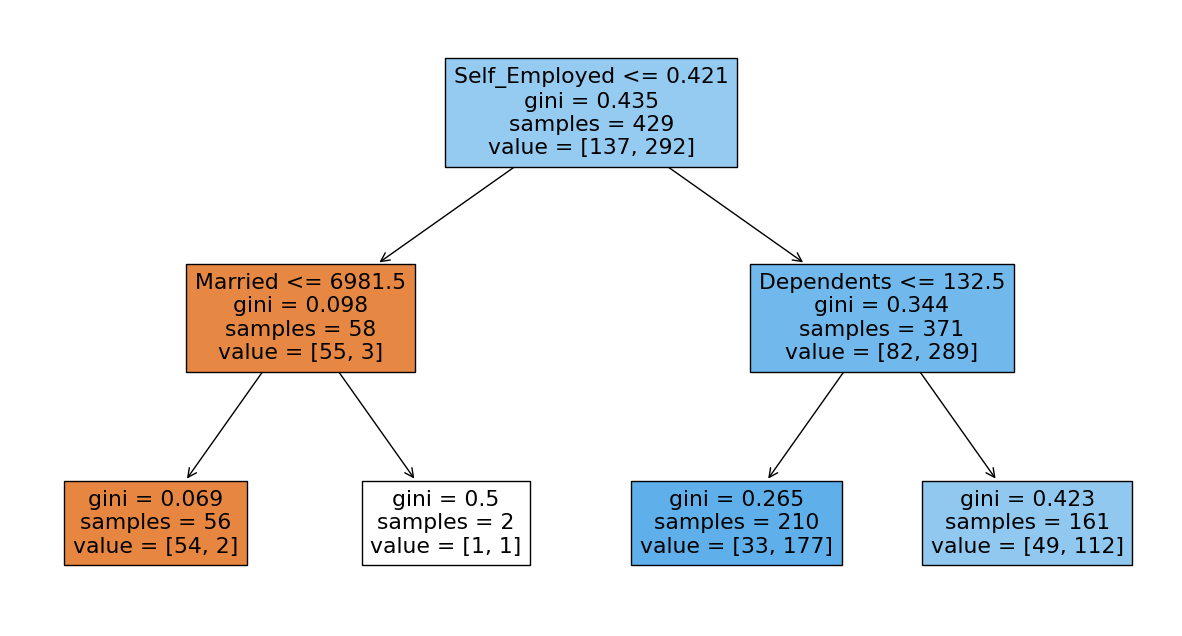

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
from sklearn.tree import plot_tree
plot_tree(dtc_model,feature_names=X.columns,filled=True)
plt.show()

### Predicting Values for training and Testsing

In [38]:
tr_pred = dtc_model.predict(xtrain)
ts_pred = dtc_model.predict(xtest)

In [39]:
#tr_pred

In [40]:
#ts_pred

### Calculate Accuracy Score for base model

In [41]:
def evaluator(ytrain,ytest,tr_pred,ts_pred):
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    print('Training Accuracy :',tr_acc)
    print('Testing Accuracy  :',ts_acc)

In [42]:
evaluator(ytrain,ytest,tr_pred,ts_pred)

Training Accuracy : 0.8018648018648019
Testing Accuracy  : 0.827027027027027


In [43]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ts_pred)
cf

array([[ 27,  28],
       [  4, 126]])

<Axes: >

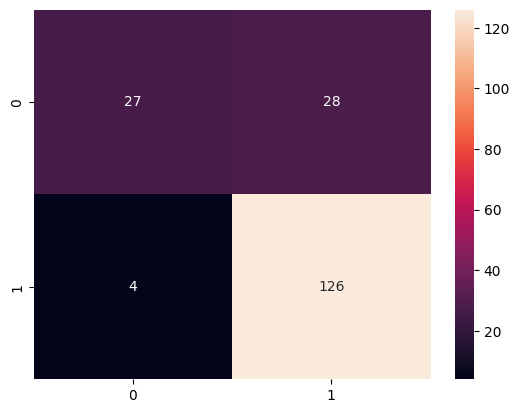

In [44]:
import seaborn as sb
sb.heatmap(cf,annot=True,fmt='d')

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           N       0.87      0.49      0.63        55
           Y       0.82      0.97      0.89       130

    accuracy                           0.83       185
   macro avg       0.84      0.73      0.76       185
weighted avg       0.83      0.83      0.81       185



### Deciding values of Hyperparameters

In [46]:
params = {'max_depth':[1,2,3],
          'min_samples_leaf':[1,2,3],
          'criterion':['gini','entropy']}

In [47]:
from sklearn.model_selection import GridSearchCV
#model = DecisionTreeClassifier()
gscv = GridSearchCV(dtc_model,param_grid=params,cv=5)
best_model = gscv.fit(xtrain,ytrain)
best_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3]})

In [48]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}

In [49]:
gscv.best_score_

0.8018878248974008

### Predict data & Evaluate accuracy

In [50]:
tr_pred = best_model.predict(xtrain)
ts_pred = best_model.predict(xtest)
evaluator(ytrain,ytest,tr_pred,ts_pred)

Training Accuracy : 0.8018648018648019
Testing Accuracy  : 0.827027027027027


### Confusion Matrix

<Axes: >

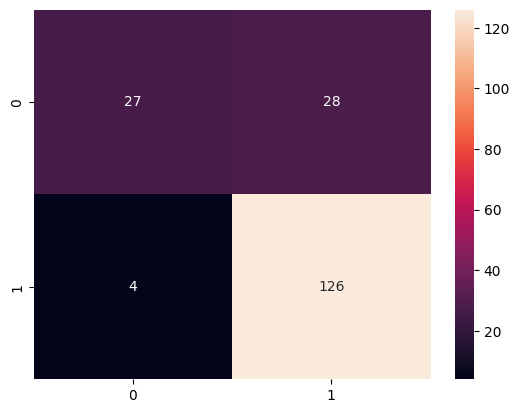

In [51]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ts_pred)
import seaborn as sb
sb.heatmap(cf,annot=True,fmt='d')

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           N       0.87      0.49      0.63        55
           Y       0.82      0.97      0.89       130

    accuracy                           0.83       185
   macro avg       0.84      0.73      0.76       185
weighted avg       0.83      0.83      0.81       185



### Creating AdaBoost Classifier Model

In [53]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(dtc_model, n_estimators=30)
abc_model = abc.fit(xtrain,ytrain)

### Predict data & Evaluate accuracy

In [54]:
tr_pred = abc_model.predict(xtrain)
ts_pred = abc_model.predict(xtest)
evaluator(ytrain,ytest,tr_pred,ts_pred)

Training Accuracy : 0.9300699300699301
Testing Accuracy  : 0.745945945945946


### Confusion Matrix

<Axes: >

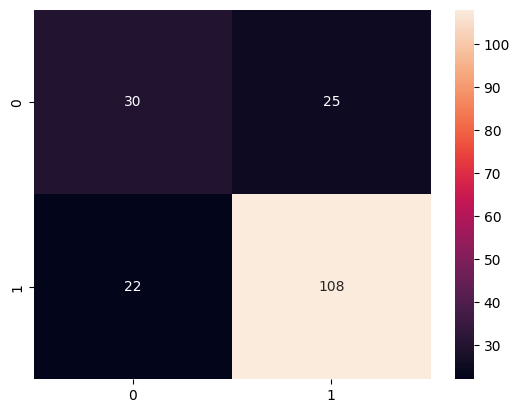

In [55]:
cf = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf,annot=True,fmt='d')

In [56]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           N       0.58      0.55      0.56        55
           Y       0.81      0.83      0.82       130

    accuracy                           0.75       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.74      0.75      0.74       185



### Creating KNN Classifier Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=20)
knc_model = knc.fit(xtrain,ytrain)

#### Predict data & Evaluate accuracy

In [58]:
tr_pred = abc_model.predict(xtrain)
ts_pred = abc_model.predict(xtest)
evaluator(ytrain,ytest,tr_pred,ts_pred)

Training Accuracy : 0.9300699300699301
Testing Accuracy  : 0.745945945945946


<Axes: >

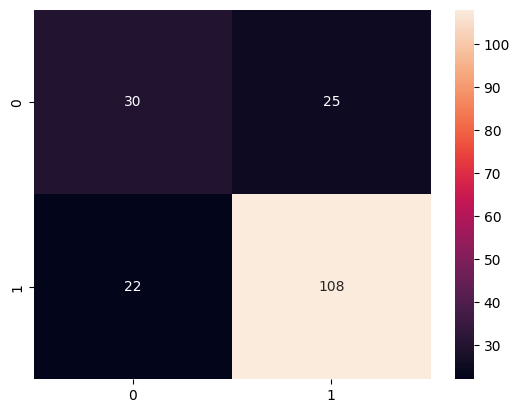

In [59]:
#Confusion Matrix
cf = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf,annot=True,fmt='d')

### Building Random Forest Classifier model with Hyper parameter tuning

In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=21)
gscv = GridSearchCV(rfc,param_grid=params,cv=5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='f1_macro')

In [61]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

In [62]:
gscv.best_score_

0.714601202810802

In [63]:
best_model = gscv.best_estimator_
best_model

RandomForestClassifier(max_depth=3, random_state=21)

#### Predict data & Evaluate accuracy

In [64]:
tr_pred = best_model.predict(xtrain)
ts_pred = best_model.predict(xtest)
evaluator(ytrain,ytest,tr_pred,ts_pred)

Training Accuracy : 0.8065268065268065
Testing Accuracy  : 0.8216216216216217


<Axes: >

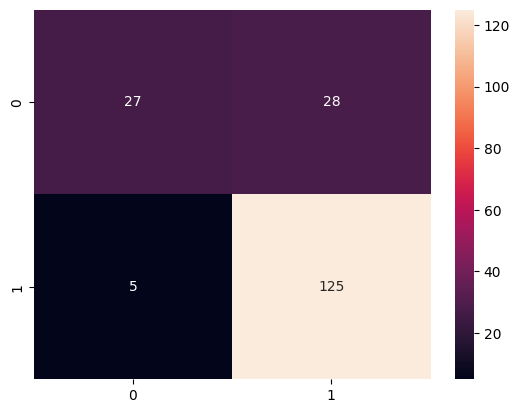

In [65]:
#Confusion Matrix
cf = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf,annot=True,fmt='d')

In [66]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           N       0.84      0.49      0.62        55
           Y       0.82      0.96      0.88       130

    accuracy                           0.82       185
   macro avg       0.83      0.73      0.75       185
weighted avg       0.82      0.82      0.81       185



In [67]:
ts_pred

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

### Building Logistic Regression model

In [68]:
#Simple Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

### Predict data & Evaluate accuracy

In [69]:
tr_pred = lr.predict(xtrain)
ts_pred = lr.predict(xtest)
evaluator(ytrain,ytest,tr_pred,ts_pred)

Training Accuracy : 0.8088578088578089
Testing Accuracy  : 0.8162162162162162


<Axes: >

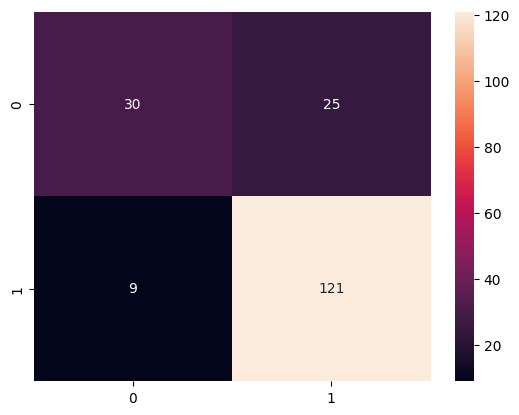

In [70]:
#Confusion Matrix
cf = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf,annot=True,fmt='d')

In [71]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           N       0.77      0.55      0.64        55
           Y       0.83      0.93      0.88       130

    accuracy                           0.82       185
   macro avg       0.80      0.74      0.76       185
weighted avg       0.81      0.82      0.81       185



### Logistic Regression model with Hyper parameter tuning

In [72]:
import numpy as np
lambdas = np.arange(0.1,10,0.1)
lambdas

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [73]:
params = {'penalty':['l1','l2'],
          'C':lambdas}

In [74]:
lr = LogisticRegression()
gscv = GridSearchCV(lr,param_grid=params,scoring='accuracy',cv=5)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [75]:
gscv.best_params_

{'C': 1.4000000000000001, 'penalty': 'l2'}

In [76]:
gscv.best_score_

0.8065389876880985

In [77]:
best_model = gscv.best_estimator_
best_model

LogisticRegression(C=1.4000000000000001)

### Predict data

In [78]:
tr_pred = best_model.predict(xtrain)
ts_pred = best_model.predict(xtest)

### Evaluate accuracy

In [79]:
evaluator(ytrain,ytest,tr_pred,ts_pred)

Training Accuracy : 0.8065268065268065
Testing Accuracy  : 0.8108108108108109


In [80]:
#(0.8088578088578089, 0.8162162162162162)

<Axes: >

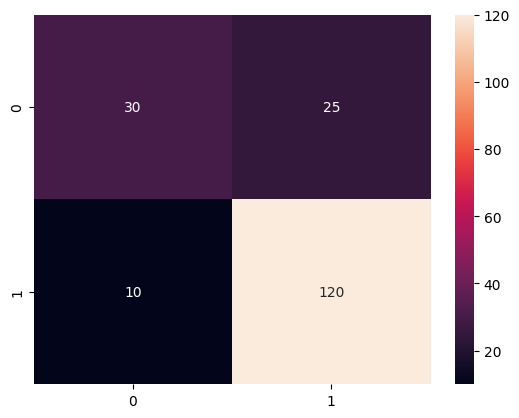

In [81]:
#Confusion Matrix
cf = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf,annot=True,fmt='d')

In [82]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           N       0.75      0.55      0.63        55
           Y       0.83      0.92      0.87       130

    accuracy                           0.81       185
   macro avg       0.79      0.73      0.75       185
weighted avg       0.80      0.81      0.80       185



#### After Comparing all the results --> Choosing & ""Logistic Regression"" as Final Trainning Model

### Building "Logistic Regression" model with Hyper parameter tuning for Entire Data

In [83]:
best_model.fit(Xnew,Y)

LogisticRegression(C=1.4000000000000001)

In [84]:
final_ypred_tr = best_model.predict(Xnew)

### Evaluate accuracy

In [85]:
final_tr_acc = accuracy_score(Y,final_ypred_tr)
final_tr_acc

0.8110749185667753

<Axes: >

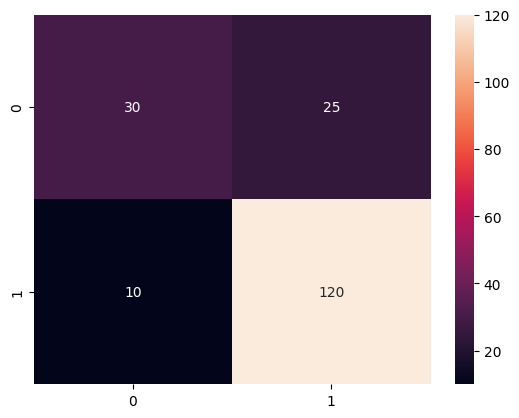

In [86]:
#Confusion Matrix
cf = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf,annot=True,fmt='d')

In [87]:
from sklearn.metrics import classification_report
print(classification_report(Y,final_ypred_tr))

              precision    recall  f1-score   support

           N       0.90      0.45      0.60       192
           Y       0.80      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



In [88]:
train["Pred_Loan_Status"]=final_ypred_tr
pred_train = train
#train['Pred_Loan_Status'] = le.fit_transform(train['Pred_Loan_Status'])
pred_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0,Y
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,1,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,1,Y


### Predict data for Testing csv

In [89]:
testX1= test[con]

In [90]:
testX2= test[cat]

In [91]:
testX2 = ohe.transform(testX2).toarray()

In [92]:
cols = ohe.get_feature_names_out()
cols

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [93]:
testX2 = pd.DataFrame(testX2,columns=cols)
testX2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [94]:
testXnew = testX1.join(testX2)

In [95]:
testXnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.00000,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,5405.54085,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.00000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.00000,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,6000.00000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [96]:
final_ypred_test = best_model.predict(testXnew)
#final_ypred_test

In [97]:
test["Pred_Loan_Status"]=final_ypred_test
#test['Pred_Loan_Status'] = le.transform(test['Pred_Loan_Status'])
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y,Y


In [98]:
pred_test = test

In [99]:
Q = pred_test[["Loan_ID","Pred_Loan_Status"]]
Q.head()

,Loan_ID,Pred_Loan_Status
0,LP001002,Y
1,LP001003,Y
2,LP001005,Y
3,LP001006,Y
4,LP001008,Y


In [100]:
#Q.to_csv("Desktop/Loan_Statement1_Status_submissionsAG.csv")

In [101]:
#Project Problem Statement1 Done! :)

## --------------------------- Problem Statement2 ---------------------------------

#### Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

In [102]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0,Y
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1,Y


In [103]:
con = []
cat = []
for i in train.columns:
    if(train[i].dtypes != "object"):
        con.append(i)
    else:
        cat.append(i)

In [104]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Pred_Loan_Status']

In [105]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status']

In [106]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
mm = MinMaxScaler()
Xsc = mm.fit_transform(train[con])
cols = mm.get_feature_names_out()
X1 = pd.DataFrame(Xsc,columns=cols)

ohe = OneHotEncoder()
Xoe = ohe.fit_transform(train[cat]).toarray()
cols = ohe.get_feature_names_out()
X2 = pd.DataFrame(Xoe,columns=cols)

Xnew = X1.join(X2)

In [107]:
Xnew.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N,Pred_Loan_Status_Y
0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.065004,0.036192,0.172214,0.74359,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.035250,0.000000,0.082489,0.74359,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Creating KMeans Clusturing Model and Training

In [108]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [109]:
model = km.fit(Xnew)

In [110]:
#pred = model.predict(Xnew)

In [111]:
wcss = model.inertia_
wcss

1211.4010762948246

### Elbow Method

In [112]:
k = []
wcss_list = []
for i in range(1,20,1):
    km = KMeans(n_clusters= i)
    model = km.fit(Xnew)
    wcss = model.inertia_
    wcss_list.append(wcss)
    k.append(i)
    print("k =",i,"wcss= ",wcss)

k = 1 wcss=  1981.1235688331922
k = 2 wcss=  1651.7332874360534
k = 3 wcss=  1433.389901764338
k = 4 wcss=  1306.9817348203505
k = 5 wcss=  1200.9724531088627
k = 6 wcss=  1135.6454995446736
k = 7 wcss=  1112.0675494385314
k = 8 wcss=  1005.8864109699755
k = 9 wcss=  976.8369901472718
k = 10 wcss=  937.2028579420955
k = 11 wcss=  906.6308508334043
k = 12 wcss=  874.8297761815361
k = 13 wcss=  844.0675990311499
k = 14 wcss=  813.119764279473
k = 15 wcss=  798.5560671356085
k = 16 wcss=  759.8039124161111
k = 17 wcss=  730.530304189512
k = 18 wcss=  722.3096505880444
k = 19 wcss=  694.6842283323598


In [113]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [114]:
wcss_list

[1981.1235688331922,
 1651.7332874360534,
 1433.389901764338,
 1306.9817348203505,
 1200.9724531088627,
 1135.6454995446736,
 1112.0675494385314,
 1005.8864109699755,
 976.8369901472718,
 937.2028579420955,
 906.6308508334043,
 874.8297761815361,
 844.0675990311499,
 813.119764279473,
 798.5560671356085,
 759.8039124161111,
 730.530304189512,
 722.3096505880444,
 694.6842283323598]

Text(0.5, 1.0, 'Elbow Graph')

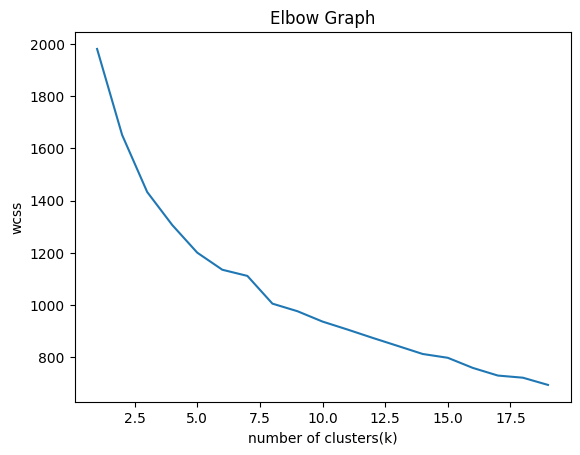

In [115]:
plt.plot(k,wcss_list)
plt.xlabel("number of clusters(k)")
plt.ylabel("wcss")
plt.title("Elbow Graph")

#### So, from the Elbow Graph there will be around 16 customer segments from given data. (15 Clusters)

In [116]:
#Project Problem Statement2 Done! :)

### --------------------------- Problem Statement 3a ---------------------------------

#### If customer is not eligible for the input required amount and duration: a.)what can be amount for the given duration.(Regression)

In [117]:
pred_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0,Y
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,1,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,1,Y


In [118]:
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y,Y


### Filttering Trainning Data for "Pred_Loan_Status" is Yes

In [119]:
p_train = pred_train[pred_train.Pred_Loan_Status=='Y']

In [120]:
p_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0,Y
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,1,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,1,Y


### Define X & Y

In [121]:
Y = p_train[['LoanAmount']]
X = p_train.drop(labels=['LoanAmount','Loan_Status'],axis=1)
#Dropping Loan Status because we have already feature as 'Predicted Loan Status'

### Cat Con Sepration

In [122]:
cat = []
con = []
for i in X.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [123]:
con

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

In [124]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Pred_Loan_Status']

### Preprocessing

In [125]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(X[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,0.092836,-0.721071,0.282646,0.308444
1,0.010415,0.008744,0.282646,0.308444
2,-0.436676,-0.721071,0.282646,0.308444
3,-0.514180,0.420112,0.282646,0.308444
4,0.120901,-0.721071,0.282646,0.308444


In [126]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X2 = ohe.fit_transform(X[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_Y
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [127]:
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_Y
0,0.092836,-0.721071,0.282646,0.308444,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.010415,0.008744,0.282646,0.308444,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.436676,-0.721071,0.282646,0.308444,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,-0.514180,0.420112,0.282646,0.308444,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.120901,-0.721071,0.282646,0.308444,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [128]:
# Dividing Data in training & testing set

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(Xnew,Y,test_size=0.2,random_state=21)

### Create a Linear Regression model

In [129]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [130]:
#model.coef_

### Find training | testing error --> Overfitting or not

In [131]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain,tr_pred)
ts_r2 = r2_score(ytest,ts_pred)

print(f'Training R2 Score : {tr_r2:.4f}')
print(f'Testing R2 Score  : {ts_r2:.4f}')

Training R2 Score : 0.4589
Testing R2 Score  : 0.3911


In [132]:
from sklearn.metrics import mean_squared_error
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest, ts_pred)

print(f'Training RMSE : {tr_mse**0.5:.4f}')
print(f'Testing RMSE  : {ts_mse**0.5:.4f}')

Training RMSE : 57.5834
Testing RMSE  : 70.2747


### Regularisation

### Lasso (L1 Regularisation) & Creating a Tuning grid for calculating lambda with help of for loop

In [133]:
from sklearn.linear_model import Lasso

import numpy as np
lambdas = np.arange(0.01,2,0.01)
#lambdas

In [134]:
tr = []
ts = []
for i in lambdas:
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_mse = mean_squared_error(ytrain,tr_pred)
    ts_mse = mean_squared_error(ytest,ts_pred)
    tr.append(tr_mse)
    ts.append(ts_mse)

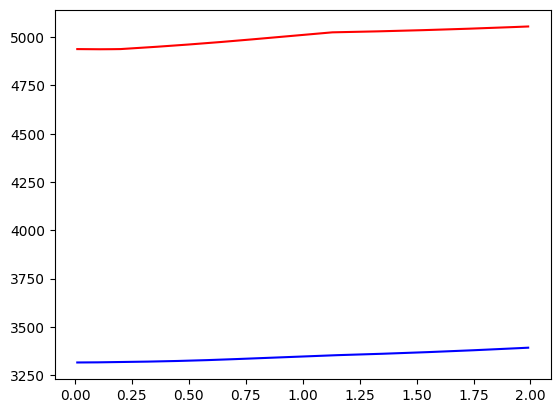

In [135]:
# Visualize the tr and ts error

plt.plot(lambdas,tr,c='blue')
plt.plot(lambdas,ts,c='red')

In [136]:
opt_lambda = 0.3

### Final optimal Lasso model - Using the best value of Alpha

In [137]:
ls = Lasso(alpha=opt_lambda)
model = ls.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_mse = mean_squared_error(ytrain, tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)

print(tr_mse,ts_mse)

3319.941277324371 4945.805516893018


### Create a Tuning grid for K-Fold Cross Validation

In [138]:
from sklearn.model_selection import GridSearchCV
tuning_grid = {"alpha": lambdas}
ls = Lasso()
cv = GridSearchCV(ls,tuning_grid,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 1.34}

### Using the best value, create a Lasso Model by K-fold

In [139]:
best_model = cvmodel

In [140]:
model = best_model.fit(xtrain,ytrain)

In [141]:
cols = list(xtrain.columns)
cols

['ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Pred_Loan_Status_Y']

### Creating Validation/test data ready for predictions

In [142]:
train_3a = pred_train[pred_train['Pred_Loan_Status']=='N']
train_3a.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,0,N
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.0,Urban,0,N
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.0,Urban,0,N
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban,0,N
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.0,Rural,0,N


### Preprocessing

In [143]:
X1 = ss.transform(train_3a[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,-0.429985,0.490771,0.282646,-22.191531
1,-0.341888,-0.721071,0.282646,-22.191531
2,0.429427,-0.721071,0.282646,-22.191531
3,-0.511020,0.203781,0.282646,-22.191531
4,-0.368838,0.206685,0.282646,-22.191531


In [144]:
X2 = ohe.transform(train_3a[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)

X2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_Y
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [145]:
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_Y
0,-0.429985,0.490771,0.282646,-22.191531,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.341888,-0.721071,0.282646,-22.191531,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.429427,-0.721071,0.282646,-22.191531,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.511020,0.203781,0.282646,-22.191531,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.368838,0.206685,0.282646,-22.191531,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [146]:
#pred = model.predict(Xnew)

# ValueError: The feature names should match those that were passed during fit. Feature names seen at fit time, yet now missing:
#- Pred_Loan_Status_Y
#Xnew['Pred_Loan_Status_N']=0
#Xnew['Pred_Loan_Status_Y']=0

In [147]:
pred = model.predict(Xnew)

In [148]:
train_3a['Pred_LoanAmount']=pred
train_3a

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.000000,Semiurban,0,N,143.092463
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.000000,Urban,0,N,114.240268
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.000000,Urban,0,N,148.009438
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.000000,Semiurban,0,N,118.081734
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.000000,Rural,0,N,134.602901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Male,Yes,1,Graduate,No,2787.0,1917.0,146.0,360.0,0.000000,Rural,0,N,136.700919
589,Male,Yes,2,Graduate,Yes,2726.0,0.0,106.0,360.0,0.000000,Semiurban,0,N,122.328178
597,Male,No,0,Graduate,No,2987.0,0.0,88.0,360.0,0.000000,Semiurban,0,N,109.720356
600,Female,No,3+,Graduate,No,416.0,41667.0,350.0,180.0,0.842199,Urban,0,N,385.535477


In [149]:
train_3a[['Pred_Loan_Status',"Loan_Amount_Term","LoanAmount","Pred_LoanAmount"]]

,Pred_Loan_Status,Loan_Amount_Term,LoanAmount,Pred_LoanAmount
7,N,360.0,158.0,143.092463
17,N,360.0,76.0,114.240268
20,N,360.0,104.0,148.009438
22,N,360.0,116.0,118.081734
23,N,360.0,112.0,134.602901
...,...,...,...,...
584,N,360.0,146.0,136.700919
589,N,360.0,106.0,122.328178
597,N,360.0,88.0,109.720356
600,N,180.0,350.0,385.535477


### Predictions for Test Data

In [150]:
test_pr = test.drop(labels=['Loan_ID','LoanAmount','Loan_Status'],axis=1)

In [151]:
cat = []
con = []
for i in test_pr.columns:
    if(test_pr[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [152]:
test_3a = test_pr[test_pr['Pred_Loan_Status']=='N']
test_3a.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,360.0,0.0,Semiurban,N
17,Female,No,0,Graduate,No,3510.0,0.0,360.0,0.0,Urban,N
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,360.0,0.0,Urban,N
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,360.0,0.0,Semiurban,N
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,360.0,0.0,Rural,N


In [153]:
#Preprocessing
X1 = ss.transform(test_3a[con])
X1= pd.DataFrame(X1, columns= con)

X2 = ohe.transform(test_3a[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)

Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_Y
0,-0.429985,0.490771,0.282646,-22.191531,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.341888,-0.721071,0.282646,-22.191531,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.429427,-0.721071,0.282646,-22.191531,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.511020,0.203781,0.282646,-22.191531,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.368838,0.206685,0.282646,-22.191531,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [154]:
# finalts_pred = model.predict(Xnew)

#ValueError: The feature names should match those that were passed during fit.
#Feature names seen at fit time, yet now missing: - Loan_Status - Pred_Loan_Status_Y

#ValueError: The feature names should match those that were passed during fit. Feature names seen at fit time, yet now missing:
#- Pred_Loan_Status_Y

#Xnew['Pred_Loan_Status_Y']=0

In [155]:
finalts_pred = model.predict(Xnew)

In [156]:
finalts_pred

array([143.09246338, 114.2402676 , 148.00943776, 118.08173395,
       134.60290108, 113.02960633, 136.60711815, 198.15553268,
       116.4951206 , 141.50539486, 119.90960252, 107.97483297,
       121.06766789, 131.49284417, 150.77194421, 157.61104141,
       141.11596838, 167.23260802, 204.65966546, 266.70114584,
       213.53140925, 138.15345316, 431.67921476, 134.71014517,
       111.75372844, 228.05456134, 115.97000177, 206.44314802,
       113.33466839, 136.31829633, 137.44048679, 141.98072019,
       108.09733856, 124.32048826, 224.34290008, 129.05518903,
       182.0359991 , 149.29629579, 139.22808092, 136.79535289,
       139.23617517, 118.55654424, 118.10288448, 209.65310922,
       126.39995394, 102.49447242, 135.58505528, 136.43537089,
       128.28421099, 126.91164339, 121.81353101, 130.47264977,
       111.38831558, 109.86981504, 103.8709914 , 166.24269948,
       798.79391237, 134.49291365, 123.76112175,  99.0423496 ,
       172.18851868, 126.4854385 , 140.08068135, 173.92

In [157]:
pred_test = pred_test[pred_test['Pred_Loan_Status']=='N']
pred_test["Pred_LoanAmount"]= finalts_pred
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
7,LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N,N,143.092463
17,LP001036,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.0,Urban,N,N,114.240268
20,LP001043,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.0,Urban,N,N,148.009438
22,LP001047,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban,N,N,118.081734
23,LP001050,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.0,Rural,N,N,134.602901


In [158]:
Q = pred_test[["Loan_ID","Pred_Loan_Status","Loan_Amount_Term","LoanAmount","Pred_LoanAmount"]]
Q.head()

,Loan_ID,Pred_Loan_Status,Loan_Amount_Term,LoanAmount,Pred_LoanAmount
7,LP001014,N,360.0,158.0,143.092463
17,LP001036,N,360.0,76.0,114.240268
20,LP001043,N,360.0,104.0,148.009438
22,LP001047,N,360.0,116.0,118.081734
23,LP001050,N,360.0,112.0,134.602901


In [159]:
#Q.to_csv("Desktop/Loan_Statement3a_Status_submissionsAG.csv")

In [160]:
#Project Problem Statement3a Done! :)

### --------------------------- Problem Statement 3b ---------------------------------

#### if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [161]:
train_3a.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,0,N,143.092463
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.0,Urban,0,N,114.240268
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.0,Urban,0,N,148.009438
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban,0,N,118.081734
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.0,Rural,0,N,134.602901


In [162]:
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
7,LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N,N,143.092463
17,LP001036,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.0,Urban,N,N,114.240268
20,LP001043,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.0,Urban,N,N,148.009438
22,LP001047,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban,N,N,118.081734
23,LP001050,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.0,Rural,N,N,134.602901


### Define X & Y

In [163]:
Y = train_3a[['Loan_Amount_Term']]
X = train_3a.drop(labels=['Loan_Amount_Term','Loan_Status'],axis=1)
#Dropping Loan Status because we have already feature as 'Predicted Loan Status'

### Cat Con Sepration

In [164]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [165]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Pred_Loan_Status']

In [166]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Pred_LoanAmount']

### Preprocessing

In [167]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(X[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X2 = ohe.fit_transform(X[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,-0.295091,0.031674,0.030144,-0.279478,-0.132647,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.242741,-0.417710,-0.798531,-0.279478,-0.473660,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.215591,-0.417710,-0.515569,-0.279478,-0.074531,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.343243,-0.074750,-0.394299,-0.279478,-0.428256,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.258755,-0.073673,-0.434722,-0.279478,-0.232987,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [168]:
# Dividing Data in training & testing set

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(Xnew,Y,test_size=0.2,random_state=21)

### Create a Linear Regression model

In [169]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [170]:
# Find training | testing error --> Overfitting or not
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain,tr_pred)
ts_r2 = r2_score(ytest,ts_pred)
from sklearn.metrics import mean_squared_error
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest, ts_pred)

print(f'Training R2 Score : {tr_r2:.4f}')
print(f'Testing R2 Score  : {ts_r2:.4f}')
print(f'Training RMSE : {tr_mse**0.5:.4f}')
print(f'Testing RMSE  : {ts_mse**0.5:.4f}')

Training R2 Score : 1.0000
Testing R2 Score  : 1.0000
Training RMSE : 0.0000
Testing RMSE  : 0.0000


In [171]:
#Regularisation:- Lasso (L1 Regularisation) & Creating a Tuning grid
#for calculating lambda with help of for loop
from sklearn.linear_model import Lasso

import numpy as np
lambdas = np.arange(0.01,1,0.01)
#lambdas

In [172]:
tr = []
ts = []
for i in lambdas:
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_mse = mean_squared_error(ytrain,tr_pred)
    ts_mse = mean_squared_error(ytest,ts_pred)
    tr.append(tr_mse)
    ts.append(ts_mse)

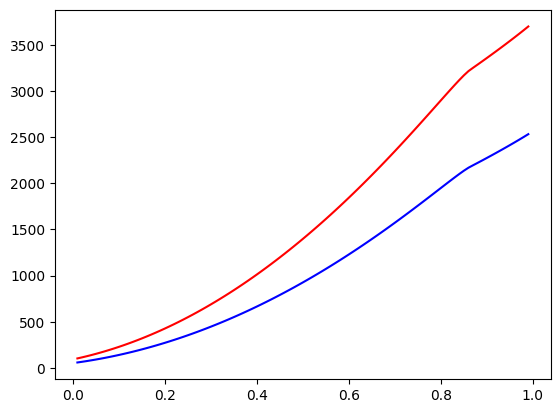

In [173]:
# Visualize the tr and ts error

plt.plot(lambdas,tr,c='blue')
plt.plot(lambdas,ts,c='red')

In [174]:
opt_lambda = 0.01

In [175]:
# Final optimal Lasso model - Using the best value of Alpha
ls = Lasso(alpha=opt_lambda)
model = ls.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_mse = mean_squared_error(ytrain, tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)

print(tr_mse,ts_mse)

59.356075106796965 103.24955036545809


In [176]:
# Create a Tuning grid for K-Fold Cross Validation
from sklearn.model_selection import GridSearchCV
tuning_grid = {"alpha": lambdas}

ls = Lasso()
cv = GridSearchCV(ls,tuning_grid,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(Xnew,Y)

cvmodel.best_params_

{'alpha': 0.01}

In [177]:
# Using the best value, create a Lasso Model by K-fold
best_model = cvmodel
model = best_model.fit(xtrain,ytrain)

In [178]:
cols = list(xtrain.columns)
cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Pred_LoanAmount',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Pred_Loan_Status_N']

### Creating predictions

In [179]:
train_3b = train_3a[train_3a['Loan_Amount_Term']<=240]
train_3b

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
62,Male,Yes,0,Not Graduate,Yes,2609.0,3449.0,165.0,180.0,0.000000,Rural,0,N,116.495121
66,Male,No,0,Not Graduate,No,3200.0,2254.0,126.0,180.0,0.000000,Urban,0,N,107.974833
128,Male,Yes,1,Graduate,Yes,10513.0,3850.0,160.0,180.0,0.000000,Urban,0,N,204.659665
155,Male,Yes,3+,Graduate,No,39999.0,0.0,600.0,180.0,0.000000,Semiurban,1,N,431.679215
373,Male,No,1,Graduate,No,3062.0,1987.0,111.0,180.0,0.000000,Urban,0,N,121.813531
400,Male,Yes,2,Not Graduate,No,2889.0,0.0,45.0,180.0,0.000000,Urban,0,N,103.870991
453,Male,Yes,0,Graduate,No,2483.0,2466.0,90.0,180.0,0.000000,Rural,1,N,115.399716
466,Male,Yes,3+,Not Graduate,No,2947.0,1664.0,70.0,180.0,0.000000,Urban,0,N,116.390509
471,Male,Yes,1,Not Graduate,No,2653.0,1500.0,113.0,180.0,0.000000,Rural,0,N,112.665187
554,Male,Yes,0,Graduate,No,3593.0,4266.0,132.0,180.0,0.000000,Rural,0,N,137.993174


In [180]:
train_3b = train_3b.drop(labels=['Loan_Amount_Term','Loan_Status'],axis=1)
train_3b.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount
62,Male,Yes,0,Not Graduate,Yes,2609.0,3449.0,165.0,0.0,Rural,N,116.495121
66,Male,No,0,Not Graduate,No,3200.0,2254.0,126.0,0.0,Urban,N,107.974833
128,Male,Yes,1,Graduate,Yes,10513.0,3850.0,160.0,0.0,Urban,N,204.659665
155,Male,Yes,3+,Graduate,No,39999.0,0.0,600.0,0.0,Semiurban,N,431.679215
373,Male,No,1,Graduate,No,3062.0,1987.0,111.0,0.0,Urban,N,121.813531


In [181]:
# Preprocessing
X1 = ss.transform(train_3b[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount
0,-0.342249,0.201270,0.100884,-0.279478,-0.447009
1,-0.276978,-0.013193,-0.293241,-0.279478,-0.547713
2,0.530681,0.273236,0.050355,-0.279478,0.595035
3,3.787160,-0.417710,4.496901,-0.279478,3.278249
4,-0.292219,-0.061110,-0.444828,-0.279478,-0.384149


In [182]:
X2 = ohe.transform(train_3a[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [183]:
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,-0.342249,0.201270,0.100884,-0.279478,-0.447009,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.276978,-0.013193,-0.293241,-0.279478,-0.547713,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.530681,0.273236,0.050355,-0.279478,0.595035,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,3.787160,-0.417710,4.496901,-0.279478,3.278249,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.292219,-0.061110,-0.444828,-0.279478,-0.384149,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [184]:
pred = model.predict(Xnew)

#No Error
# ValueError: The feature names should match those that were passed during fit. Feature names seen at fit time, yet now missing:
#- Pred_Loan_Status_Y
#Xnew['Pred_Loan_Status_Y']=0

In [185]:
train_3b['Pred_Loan_Amount_Term']=pred

train_3b.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount,Pred_Loan_Amount_Term
62,Male,Yes,0,Not Graduate,Yes,2609.0,3449.0,165.0,0.0,Rural,N,116.495121,-7.512889
66,Male,No,0,Not Graduate,No,3200.0,2254.0,126.0,0.0,Urban,N,107.974833,117.657337
128,Male,Yes,1,Graduate,Yes,10513.0,3850.0,160.0,0.0,Urban,N,204.659665,408.446545
155,Male,Yes,3+,Graduate,No,39999.0,0.0,600.0,0.0,Semiurban,N,431.679215,425.648322
373,Male,No,1,Graduate,No,3062.0,1987.0,111.0,0.0,Urban,N,121.813531,223.675329


In [186]:
Q = train_3b[['Pred_Loan_Status',"Pred_Loan_Amount_Term","LoanAmount"]]
Q.head()

,Pred_Loan_Status,Pred_Loan_Amount_Term,LoanAmount
62,N,-7.512889,165.0
66,N,117.657337,126.0
128,N,408.446545,160.0
155,N,425.648322,600.0
373,N,223.675329,111.0


### Predictions for Test Data

In [187]:
test_3b = pred_test[pred_test['Loan_Amount_Term']<=240]
test_3b.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
62,LP001207,Male,Yes,0,Not Graduate,Yes,2609.0,3449.0,165.0,180.0,0.0,Rural,N,N,116.495121
66,LP001228,Male,No,0,Not Graduate,No,3200.0,2254.0,126.0,180.0,0.0,Urban,N,N,107.974833
128,LP001451,Male,Yes,1,Graduate,Yes,10513.0,3850.0,160.0,180.0,0.0,Urban,N,N,204.659665
155,LP001536,Male,Yes,3+,Graduate,No,39999.0,0.0,600.0,180.0,0.0,Semiurban,Y,N,431.679215
373,LP002205,Male,No,1,Graduate,No,3062.0,1987.0,111.0,180.0,0.0,Urban,N,N,121.813531


In [188]:
p_test_3b = test_3b.drop(labels=['Loan_ID','Loan_Amount_Term','Loan_Status'],axis=1)
p_test_3b.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount
62,Male,Yes,0,Not Graduate,Yes,2609.0,3449.0,165.0,0.0,Rural,N,116.495121
66,Male,No,0,Not Graduate,No,3200.0,2254.0,126.0,0.0,Urban,N,107.974833
128,Male,Yes,1,Graduate,Yes,10513.0,3850.0,160.0,0.0,Urban,N,204.659665
155,Male,Yes,3+,Graduate,No,39999.0,0.0,600.0,0.0,Semiurban,N,431.679215
373,Male,No,1,Graduate,No,3062.0,1987.0,111.0,0.0,Urban,N,121.813531


In [189]:
cat = []
con = []
for i in p_test_3b.columns:
    if(p_test_3b[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [190]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Pred_Loan_Status']

In [191]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Pred_LoanAmount']

In [192]:
#Preprocessing
X1 = ss.transform(p_test_3b[con])
X1= pd.DataFrame(X1, columns= con)

X2 = ohe.transform(p_test_3b[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)

Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,-0.342249,0.201270,0.100884,-0.279478,-0.447009,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,-0.276978,-0.013193,-0.293241,-0.279478,-0.547713,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.530681,0.273236,0.050355,-0.279478,0.595035,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,3.787160,-0.417710,4.496901,-0.279478,3.278249,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.292219,-0.061110,-0.444828,-0.279478,-0.384149,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [193]:
finalts_pred = model.predict(Xnew)

#No Error
#The feature names should match those that were passed during fit. Feature names seen at fit time, yet now missing:
#- Pred_Loan_Status_Y

In [194]:
finalts_pred

array([197.94166372, 201.79158518, 195.06333483, 213.98490256,
       197.4718937 , 198.74111859, 201.52088319, 193.06281846,
       193.99371254, 201.63093906, 188.5314761 ])

In [195]:
pred_test = test_3b[test_3b['Pred_Loan_Status']=='N']
pred_test["Pred_Loan_Amount_Term"]= finalts_pred
pred_test.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount,Pred_Loan_Amount_Term
62,LP001207,Male,Yes,0,Not Graduate,Yes,2609.0,3449.0,165.0,180.0,0.0,Rural,N,N,116.495121,197.941664
66,LP001228,Male,No,0,Not Graduate,No,3200.0,2254.0,126.0,180.0,0.0,Urban,N,N,107.974833,201.791585
128,LP001451,Male,Yes,1,Graduate,Yes,10513.0,3850.0,160.0,180.0,0.0,Urban,N,N,204.659665,195.063335
155,LP001536,Male,Yes,3+,Graduate,No,39999.0,0.0,600.0,180.0,0.0,Semiurban,Y,N,431.679215,213.984903
373,LP002205,Male,No,1,Graduate,No,3062.0,1987.0,111.0,180.0,0.0,Urban,N,N,121.813531,197.471894


In [196]:
Q = pred_test[["Loan_ID","Pred_Loan_Status","Loan_Amount_Term","Pred_Loan_Amount_Term","LoanAmount","Pred_LoanAmount"]]
Q.head()


,Loan_ID,Pred_Loan_Status,Loan_Amount_Term,Pred_Loan_Amount_Term,LoanAmount,Pred_LoanAmount
62,LP001207,N,180.0,197.941664,165.0,116.495121
66,LP001228,N,180.0,201.791585,126.0,107.974833
128,LP001451,N,180.0,195.063335,160.0,204.659665
155,LP001536,N,180.0,213.984903,600.0,431.679215
373,LP002205,N,180.0,197.471894,111.0,121.813531


In [197]:
#Q.to_csv("Desktop/Loan_Statement3b_Status_submissionsAG.csv")

In [198]:
#Project Problem Statement3b Done! :)

In [199]:
#Project Loan Prediction Done! :)